# 앙상블 학습을 통한 분류
- 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
  - 분류기(Classifer) : 분류 알고리즘
- 앙상블 학습의 목표 : 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것
- 넓은 의미로 서로 다른 모델을 결합한 것들을 앙상블로 지칭하기도 한다.

## 1. 앙상블의 유형
1. 보팅(Voting)
  - Hard Voting
  - Soft Voting
2. 배깅(Bagging)
  - 랜덤 포레스트(Random Forest) 알고리즘
3. 부스팅(Boosting)
  - 에이다 부스팅(Ada Boosting)
  - 그라디언트 부스팅(Gradient Boosting)
  - XGBosst
  - LightGBM


- 대표적으로 보팅, 배깅, 부스팅이 있고 이외 스태킹(Stacking) 등의 기법이 있다.
- 정형 데이터의 분류나 회귀에서 GBM 부스팅 계열의 앙상블이 전반적으로 높은 예측 성능을 나타낸다.

## 2. 앙상블의 특징
- 단일 모델의 약점을 다수의 모델들을 결합하여 보완한다.
- 뛰어난 성능을 가진 모델들로만 구성하는 것보다 **성능이 떨어지더라도 서로 다른 유형의 모델을 섞는 것이 오히려 전체 성능에 도움**이 된다.
- 배깅의 랜덤 포레스트 및 부스팅의 뛰어난 알고리즘들은 모두 **결정 트리 알고리즘을 기반 알고리즘으로 적용**한다.
  - 결정 트리의 단점인 과적합(Overfitting)을 수십 혹은 수천 개의 많은 분류기를 결합해 보완
  - 결정 트리의 장점인 직관적인 분류 기준은 강화됨


## 3. 보팅(Voting)과 배깅(Bagging)
### 보팅과 배깅의 공통점
- 보팅과 배깅은 **여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정**하는 방식이다.

### 보팅과 배깅의 차이점
- 보팅은 **서로 다른 알고리즘을 가진 분류기를 결합**한다.
- 배깅은 **같은 알고리즘을 가진 분류기를 결합**하지만, **데이터 샘플링을 서로 다르게 수행**하면서 학습을 수행해 보팅을 수행한다.

### 보팅의 종류
1. Hard Voting
  - 다수의 분류기 간 다수결로 최종 타겟(레이블) 클래스 결정
  - ex. 3개의 분류기 중 각각 클래스1 예측, 클래스1 예측, 클래스 2 예측을 했다면 하드 보팅으로 최종 타겟 클래스를 클래스1로 예측하기로 결정한다.

2. Soft Voting
  - 다수의 분류기들의 타겟 클래스 확률에 대한 평균으로 클래스 결정.
    - `predict_prob()`를 활용해 양성 예측 확률을 구할 수 있다.
  - 일반적으로 Hard Voting보다 Soft Voting을 많이 사용된다.
  - ex. 3개의 분류기 각각에서 특정 클래스로 예측할 확룰을 구한다. 각 클래스별 예측 확률의 평균을 비교해 가장 높은 평균을 가진 클래스로 예측하기로 결정한다.

### 배깅(Bagging)
- Bootstrap Sampling의 줄임말
- 샘플링(Sampling) 방식으로 Bootstrap을 사용하는 것을 배깅이라고 한다.
  - 샘플링(Sampling) : 전체 데이터 중 일부만 추출하는 것을 의미
  - Bootstrap : 기존 학습 데이터 세트로 부터 **랜덤하게 복원추출**하여 동일한 사이즈의 데이터 세트를 여러 개 만드는 것을 의미
    - 중복된 데이터 추출을 허용하는 것이다.

## 4. 랜덤 포레스트(Random Forest)
- 배깅의 대표적인 알고리즘
- **여러 개의 결정 트리 분류기**가 전체 데이터에서 **배깅 방식으로 각자의 데이터를 샘플링해** 개별적으로 학습을 수행한 뒤 **최종적으로 모든 분류기가 보팅(Soft Voting)을 통해 예측 결정**을 한다.
- Bootstrap을 통해 데이터를 랜덤(Random)하게 트리(Tree)를 모아놓은 구조이기 때문에 숲(Forest)이 붙은 것

### 랜덤 포레스트의 주요 하이퍼 파라미터
1. `n_estimators` : 결정 트리의 개수 지정
  - Default=100
  - 많이 설정할 수록 좋은 성능을 기대할 수 있지만, 무조건 향상되는 것은 아니다.
  - 트리의 개수가 많아질수록 학습 수행시간이 오래 걸리는 것을 감안해야 한다.
2. `max_features` : 결정 트리에 사용된 `max_features` 파라미터와 같다.
  - 기본값은 `max_features=auto=sqrt(n_features)`
  - 랜덤 포레스트의 트리를 분할하는 피처를 참조할 때 전체 피처가 아니라 $\sqrt{\text 전체 피처 개수}$만큼 참조한다.

- 이 외에도 결정 트리의 하이퍼 파라미터를 계승한다.
  - `max_depth`나 `min_samples_leaf`와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 똑같이 적용될 수 있다.


### 랜덤 포레스트 모델의 장점
- `n_estimators` 하이퍼 파라미터만 잘 조절하면 어느정도 성능이 보장된 모델이 된다.
- 일반적으로 사용 많이하고 제일 좋다.

### 랜덤 포레스트 모델의 단점
- 자원(용량,CPU, 시간 등)소모가 많다.
- 초용량 거대 데이터 세트에 대해 맞지 않을 수 있다.
- 실시간 서비스가 필요한 머신러닝에 적절하지 않을 수 있다.


## 5. 랜덤 포레스트 실습

### 1. `make_moons` 데이터셋 이용

In [ ]:
# 불필요한 경고 메시지 삭제
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 사이킷 런의 make_moons 데이터 가져와 데이터 분할
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
# 랜덤포레스트 분류 알고리즘 클래스 객체 생성 후 모델 훈련
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=5, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

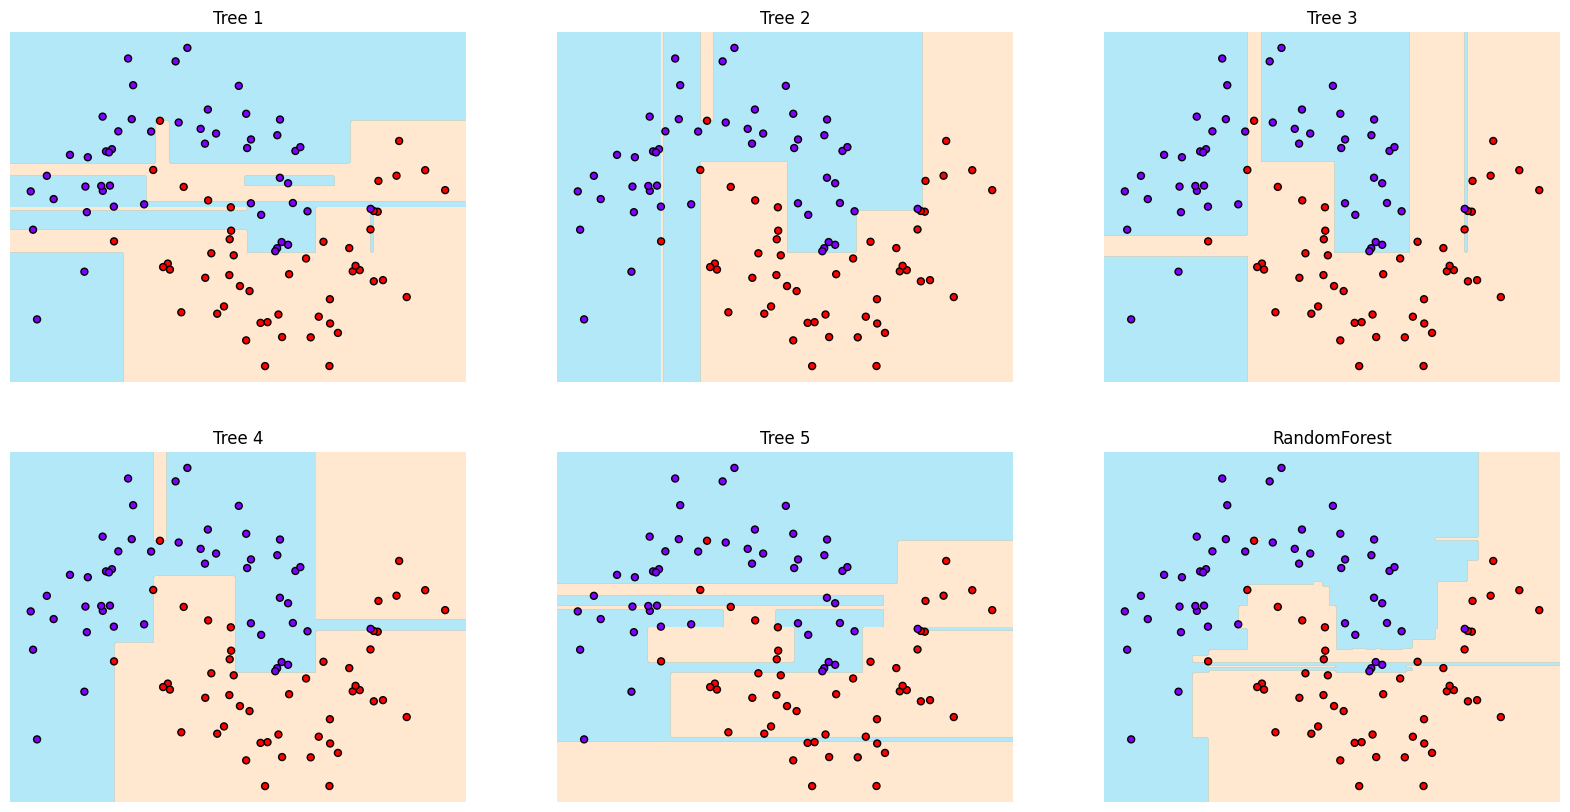

In [ ]:
import numpy as np

## Classifier의 Decision Boundary를 시각화 하는 함수 정의
def visualize_boundary(model, X, y, ax):

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)

    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

## 학습된 랜덤 포레스트 모델의 결정 영역(Decision Boundary) 시각화
import matplotlib.pyplot as plt

# axes : 그래프가 올라가는 공간 => array[[ax, ax, ax], [ax, ax, ax]]
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# n_estimators=5 => 5개의 나무에 대해 볼 수 있다.
# forest_clf.estimators_ : 랜덤 포레스트에서 훈련한 의사결정트리들의 리스트 가져오기
# ravel() 함수는 다차원 배열을 1차원 배열로 평탄화해주는 함수
# array[[ax, ax, ax], [ax, ax, ax]] => ravel 함수 => array([ax, ax, ax, ax, ax, ax])
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest_clf.estimators_)):
  ax.set_title("Tree {}".format(i+1))
  visualize_boundary(tree, X, y, ax)

# 제일 마지막에는 RandomForest 모델 시각화
axes.ravel()[-1].set_title("RandomForest")
visualize_boundary(forest_clf, X, y, axes.ravel()[-1])

plt.show()

- 학습된 RandomForest 모델이 5개의 DecisionTreeClassifier의 평균으로 최종 결과물을 도출한다.
- RandomForest 모델의 성능은 각각의 DecisionTreeClassifier보다 나은 것을 확인할 수 있다

### 2. 유방암 데이터셋 이용

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split

# 사이킷런의 load_breast_cancer 데이터세트 가져오기
cancer = load_breast_cancer()

# 피처 데이터 세트와 타겟 데이터 세트로 데이터 프레임 생성
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df['target'] = cancer.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
  data_df.drop("target", axis=1),
  data_df['target'],
  random_state=42
)

In [ ]:
## 모델에 대해 그리드 서치 수행 후 학습
from sklearn.model_selection import GridSearchCV

## RandomForestClassifier의 하이퍼 파라미터 리스트 생성
# n_estimators를 지정해 결정 트리의 개수에 따른 성능 변화를 확인하겠다.
params = {
    "n_estimators":[10, 100]
}

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=params,
    scoring='accuracy',
    cv=5
)

rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [10, 100]}, scoring='accuracy')

In [ ]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(rf_grid_search.cv_results_)

# 모델의 하이퍼 파라미터 조건별 교차 검증 예측 결과값을 확인
cv_results_df[['param_n_estimators', 'mean_test_score']]

,param_n_estimators,mean_test_score
0,10,0.946019
1,100,0.957729


- 랜덤 포레스트에서 학습기로 사용하는 결정 트리 모델의 개수(`n_estimators`)가 많을 수록 데이터를 복잡하게 해석한다.

### 3. 랜덤 포레스트의 특성 중요도 확인

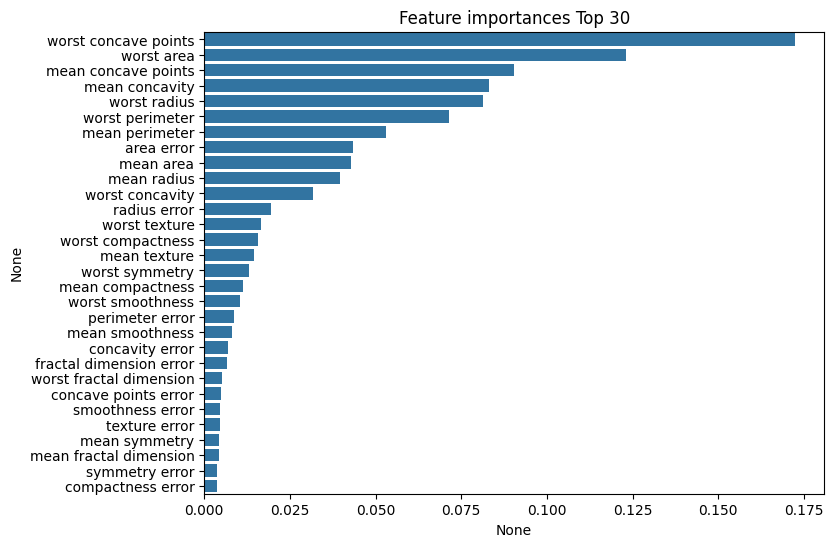

In [ ]:
## 위에서 학습한 랜덤 포레스트의 특성 중요도 확인
import matplotlib.pyplot as plt
import seaborn as sns
def plot_feature_importance(model, columns, limit=None):

  ftr_importances_values = model.feature_importances_
  # Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
  ftr_importances = pd.Series(ftr_importances_values, index=columns  )
  # 중요도값 순으로 Series를 정렬
  ftr_top = ftr_importances.sort_values(ascending=False)[:limit]
  plt.figure(figsize=(8,6))
  plt.title(f'Feature importances Top {len(columns) if limit == None else limit}')
  sns.barplot(x=ftr_top , y = ftr_top.index)
  plt.show()

plot_feature_importance(rf_grid_search.best_estimator_, X_train.columns)

* 랜덤 포레스트의 특성 중요도 확인
  - 모든 피쳐에 대해 특성 중요도를 부여한 것을 확인
  - 모든 피쳐를 사용해서 분류를 진행했다고 볼 수 있다.
  - 최대한 많은 피쳐를 바라보고 있다고 볼 수 있다.


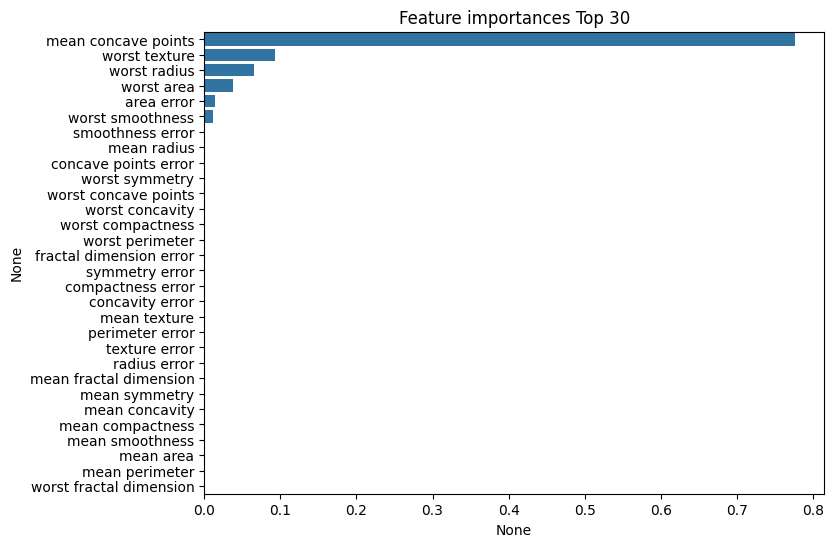

In [ ]:
## 랜덤 포레스트와 비교하기 위한 결정트리 모델 생성, 그리드 서치, 모델 학습 후 특성 중요도 확인
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8, 12, 16 ,20],
    'min_samples_split' : [16, 24],
}

dt_grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=params,
    cv=5,
    scoring='accuracy'
)

dt_grid_search.fit(X_train, y_train)
plot_feature_importance(dt_grid_search.best_estimator_, X_train.columns)

* 결정 트리 모델의 특성 중요도 확인
  - 모델의 분류 기준을 정하는데 특정 피쳐(mean concave points)에 대해서 가장 중요하게 바라보고 있다.
  - 랜덤 포레스트 모델과 비교했을 때 선택되지 않는 데이터의 특성이 많다.
  - 균일하게 분할할 수 있는 피처가 존재하면 해당 피처로만 분할하고 있는 것이다.

* 결론
  - **랜덤 포레스트 모델이** 결정 트리 모델보다 **피처 해석을 훨씬 다채롭게 한다**고 할 수 있다.
  - 때문에 결정 트리 모델보다 랜덤 포레스트를 더 많이 사용한다.


## 6. 부스팅(Boosting)
- 부스팅 알고리즘은 **여러 개의 약한 학습기(Weak Learner)**를 순차적으로 학습-예측한 데이터 혹은 학습 트리에 **가중치를 부여**하여, 가중치의 조정을 통해 오류를 개선해 나가면서 학습하는 방식
  - 약한 학습기(Weak Learner) : 학습이 덜 된, 과소적합된 것을 의미
- 부스팅의 대표적인 구현
  - AdaBoost(Adaptive Boosting)
  - 그라디언트 부트스(Gradient Boost)
    - AdaBoost를 근간으로 만들었다.
    - 보통 그라디언트 부스트를 사용한다.


### 1. 에이다 부스트(AdaBoost; Adaptive Boosting)
- Adaptive : 상호보완적인
- 약한 분류기(Weak Classifier)들은 한 번에 하나씩 순차적으로 학습을 진행한다.
- 첫 번째로 학습된 분류기에서 제대로 분류하지 못한 오류 데이터가 발생한다.
- 두 번째 분류기가 이전 분류기로부터 받은 정보를 활용하여 오류 데이터가 잘 분류될 수 있도록 가중치를 부여한다.
- 이 과정을 반복하여 **다음 분류기가 이전 분류기에서 잘못 분류한 오류 데이터의 가중치를 adaptive하게 조정하면서 오류 데이터에 더 집중하여 학습이 더 잘되게 한다.**
- **최종 분류기(Strong Classifier)는 이전에 학습한 약한 분류기들에 각각 가중치를 적용하고 조합하여 학습을 진**행한다.


### 2. GBM(Gradient Boost Machine)
- GBM도 AdaBoost와 유사하나, **가중치 업데이터로 경사 하강법을 이용**한다.
  - 가중치 업데이터 : **오류(에러)를 고치기 위해 가중치를 수정하는 것**. GBM의 목표이다.
  - GBM은 가중치 업데이터로 결정 트리마다 오류(에러) 데이터에 가중치를 부여하는 방식으로 학습기를 개선한다. GBM은 결정 트리의 개수만큼 학습한다.


* **경사하강법**
 - **오류식 $h(x)$를 최소화하는 방향성을 가지고 반복적으로 가중치 값을 갱신**하는 것
 - 반복 수행을 통해 오류를 최소화 할 수 있도록 가중치의 업데이트 값을 도출하는 기법

$$
h(x) = y - F(x)
$$


> - $F(x)$ : $feature(x)$를 입력했을 때 모델의 예측함수
>
> - $y$ : 실제 타겟값
>
> -  $h(x)$ : 오류식

### 3. 사이킷런 GBM의 주요 하이퍼 파라미터 및 튜닝
1. `loss` : 경사하강법에서 사용할 손실 함수 지정
  - Loss($L$)를 최소화하는 가중치($w$)를 찾는 것이 GBM의 목표
  - 기본값은 deviance

2. `learning_rate` : GBM이 학습을 진행할 때 마다 적용하는 학습률
  - 약한 학습기(Weak Learner-classifier)가 순차적으로 오류 값을 보정해 나가는데 적용하는 계수
  - 0에서 1 사이의 값을 지정한다. (음수는 방향이 달라지기 때문에 사용하지 않는다.)
  - 너무 작은 값을 적용할 경우, 업데이트 되는 값이 작아져서 최소 오류 값을 찾아 예측 성능이 높아질 가능성이 높으나 수행시간이 오래 걸린다. 혹은 모든 약한 학습기의 반복이 완료되어도 최소 오류 값을 찾지 못할 가능성이 생긴다.
  - 너무 큰 값을 적용하면 최소 오류 값을 찾지 못하고 그냥 지나쳐 버려 예측 성능이 떨어질 가능성이 높아지지만 빠른 수행이 가능하다.
  - 미분값이 너무 커서 손실 함수 `loss`값이 발산하지 않도록 학습률(`learning_late`)를 지정해준다.

$$
w = w - η \frac{\partial L}{\partial w}
$$

> - $w$ : 가중치, η : learning_rate, $\partial L$ : 손실 함수 미분값, $\partial w$ : 가중치 미분값

3. `n_estimators` : 약한 학습기의 개수
  - 약한 학습기의 개수가 많을 수록 예측 성능이 일정 수준까지는 좋아질 수 있으나 수행시간이 오래 걸림
  - 기본값은 100

4. `subsample` : 약한 학습기가 학습에 사용하는 데이터 샘플링 비율
  - 기본값은 1
  - 기본적으로 전체 학습 데이터를 기반으로 학습하는데, 과적합이 염려되는 경우 `subsample`을 1보다 작은 값으로 설정하면 된다.

### 4. 랜덤 포레스트와 GBM(GradientBoosting)의 성능 비교하기
- `learning_rate` 파라미터 튜닝에 신경써야 한다. 값이 조금만 달라져도 결과가 많이 달라질 수 있다.


In [ ]:
# 위 실습에서 사용한 유방암 데이터 다시 사용
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split

# 사이킷런의 load_breast_cancer 데이터세트 가져오기
cancer = load_breast_cancer()

# 피처 데이터 세트와 타겟 데이터 세트로 데이터 프레임 생성
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df['target'] = cancer.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
  data_df.drop("target", axis=1),
  data_df['target'],
  random_state=42
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 객체 생성 및 모델 학습
forest_clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

# 학습된 모델의 훈련 세트 점수와 테스트 세트 점수 확인
train_score = forest_clf.score(X_train, y_train)
test_score  = forest_clf.score(X_test, y_test)

print("훈련 세트 점수 : {:.3f}".format(train_score))
print("테스트 세트 점수 : {:.3f}".format(test_score))

훈련 세트 점수 : 1.000
테스트 세트 점수 : 0.972


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# GMB 모델 객체 생성 및 모델 학습
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01).fit(X_train, y_train)

# 학습된 모델의 훈련 세트 점수와 테스트 세트 점수 확인
train_score = gb_clf.score(X_train, y_train)
test_score  = gb_clf.score(X_test, y_test)

print("훈련 세트 점수 : {:.3f}".format(train_score))
print("테스트 세트 점수 : {:.3f}".format(test_score))

훈련 세트 점수 : 0.993
테스트 세트 점수 : 0.958


- 유방암 데이터 세트에 대해 `n_estimators=100`이 같은 랜덤 포레스트 모델과 GBM 모델의 성능을 비교할 수 있다.
- 현재로서는 테스트 세트의 점수가 더 높은 랜덤 포레스트 모델이 더 나아보이긴 하지만, GridSearchCV, 파라미터 튜닝 등을 통해 성능이 낳은 모델이 어떤 것이 찾는 과정이 필요하다.

## 7. XGBoost(eXtra Gradient Boost)
- XGB 역시 부스팅 방식

### XGB의 장점
1. 뛰어난 예측 성능
2. GBM 대비 빠른 수행시간, CPU 병렬 처리, GPU 지원
3. 다양한 성능 향상 기능
  - 가중치가 커지는 것을 방지하는 규제(Regularization) 기능 탑재
  - Tree Pruning(가지치기) : 모델 성능을 단순화 하기 위해 결정 트리의 depth를 제한하는 튜닝
4. 다양한 편의 기능
  - 조기중단(Early Stopping)
  - 자체 내장된 교차 검증
  - 결손값 자체 처리 : 일반적으로  데이터 전처리 단계에서 결손값(Null)값을 없앤 데이터 세트로 머신러닝을 학습시킨다.

### 조기 중단 기능(Early Stopping)
- XGBoost에서 조기 중단 횟수를 n으로 지정할 경우
  - 모델이 **n번 반복해서 학습했을 때 더 이상 손실함수 Loss($L$)가 감소하지 않으면** 지정된 반복 학습 횟수를 완료하지 않아도 **수행을 종료**할 수 있다.
- **학습을 위한 시간을 단축**시킨다.
- 특히 최적화 튜닝 단계에서 적절하게 사용이 가능하다.
- 너무 반복 횟수를 단축할 경우
  - 예측 성능 최적화가 안 된 상태에서 학습이 종료될 수 있으므로 유의한다.
  - 너무 작게는 설정하지 않도록 한다.

### 조기 중단 설정 파라미터
- `early_stopping_rounds` 더 이상 손실 평가 지표가 감소하지 않는 최대 반복 횟수
- `eval_metric` : 반복 수행 시 사용되는 비용 평가 지표
- `eval_set` : 평가를 수행하는 별도의 검증 데이터 세트 설정.
  - 일반적으로 검증 데이터 세트에서 반복적으로 손실 감소 성능을 평가한다.

### XGBoost의 구현
- XGBoost는 마이크로 소프트(MS)사에서 제공하는 Classifer 클래스이다.
- 파이썬 혹은 사이킷런으로 사용하기 위해 별도의 설치가 필요하다.

1. C/C++ Native Module : XGBoost는 최초 C/C++로 작성되었다.
2. Python Wrapper : C/C++ 모듈을 호출하는 파이썬 Wrapper
3. Scikit Learn Wrapper
  - 사이킷런 프레임과 통합될 수 있는 파이썬 Wrapper Class 지원
    - XGBClassifier
    - XGBRegressor
  - 학습과 예측을 다른 사이킷런 API와 동일하게 `fit()`과 `predict()`로 수행
  - GridSearchCV와 같은 다른 사이킷런 모듈과 같이 사용 가능

### XGBoost 설치
- `!pip install xgboost==<버전>` 코드를 실행하면 XGBoost 설치를 할 수 있다.
- 설치 후 런타임에서 세션 다시 시작을 해야 정상적으로 작동한다.
```python
!pip install xgboost==1.5.0
```

### XGBoost - Python Wrapper & 사이킷런 Wrapper 주요 하이퍼 파라미터 비교
1. 학습률
  - GBM의 학습률과 같은 파라미터
  - Python Wrapper : `eta`, 기본값은 0.3
  - 사이킷런 Wrapper : `learning_rate`, 기본값은 0.1
2. 학습 횟수(학습기의 개수)
  - 사이킷런 앙상블의 n_estimators와 동일한 파라미터
  - 약한 학습기의 개수 or반복 수행 횟수 or 학습 횟수
  - Python Wrapper : `num_boost_rounds`
  - 사이킷런 Wrapper : `n_estimators`

## 8. XGBoost 실습
- 유방암 데이터셋 이용

In [ ]:
## XGBoost 설치
# 설치 후 런타임에서 세션 다시 시작해야 정상 작동
!pip install xgboost==1.5.0

In [ ]:
# XGBoost 버전 확인 => 1.5.0
import xgboost as xgb
print(xgb.__version__)

1.5.0


In [ ]:
# 위 실습에서 사용한 유방암 데이터 다시 사용
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split

# 사이킷런의 load_breast_cancer 데이터세트 가져오기
cancer = load_breast_cancer()

# 피처 데이터 세트와 타겟 데이터 세트로 데이터 프레임 생성
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df['target'] = cancer.target

data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
## 데이터 분할
from sklearn.model_selection import train_test_split

# Train - Test 분할
X_train, X_test, y_train, y_test = train_test_split(
    data_df.drop('target', axis=1),
    data_df['target'],
    random_state=42
)

# Train - Valid 분할
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train,
    y_train,
    random_state=42
)

### 1. Python Native / Wrapper

In [ ]:
## DMatrix 변환
# 학습, 검증, 테스트 데이터 세트별로 변환
# 파이썬 래퍼에선 변환 필요. 사이킷런 래퍼에서는 불필요.
d_train = xgb.DMatrix(data=X_train, label=y_train)
d_valid = xgb.DMatrix(data=X_valid, label=y_valid)
d_test = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
## 하이퍼 파라미터 지정

# 하이퍼 파라미터 리스트 생성
params = {
    'max_depth': 3, # 각 결정 트리(약한 학습기)의 최대 깊이
    'eta': 0.05, # 학습률(learning rate)
    'objective': 'binary:logistic', # 목적 함수 지정
    'eval_metric': 'logloss' # Error(성능) 측정 함수
}

# 학습 횟수 지정
num_rounds = 10000

- `'objective': 'binary:logistic'` 목적함수 지정
  - 목적함수 : 모델이 예측 결과를 어떻게 표현할지 지정하는 함수
  - 목적함수를 `'binary:logistic'` 이진 분류 함수로 지정했기 때문에 **모델의 예측 결과를 0과 1사이의 확률이 반환**된다.
  - 모델의 예측 결과를 정확도 대신 확률로 표현하면, 모델별로 정확도가 똑같더라도 특정 모델이 타겟 클래스를 분류하고 있는 양성 예측 확률을 확인할 수 있는 장점이 있다.

In [ ]:
## 학습 및 검증에 사용될 데이터 세트 지정
eval_list = [
    (d_train, 'train'), # 'train' 학습/훈련 데이터 세트 지정
    (d_valid, 'eval') # 'eval' 검증 데이터 세트 지정
]

- `eval_list` 리스트에서 학습과 검증 데이터 세트를 튜플로 지정하는 것은 이후에 이 데이터 세트들을 **수정되지 않게 하겠다는 의미**이다.
- 추가적인 코딩이 진행될 때 eval_list 내부의 데이터들이 코딩에 의해 수정될 위험이 있는데, 튜플로 되어있을 경우에는 수정되지 않는다.
- **파라미터로 넘어가는 데이터의 목록들은 튜플로 작성**하는 것이 안전하고 권장한다.
- 튜플 대신 리스트로 지정할 수도 있다.


In [ ]:
## 모델 학습/훈련
# xgb_model은 학습된 객체를 반환 받는다.
xgb_model = xgb.train(
    params = params, # 하이퍼 파라미터가 들어있는 딕셔너리
    dtrain = d_train, # 훈련 데이터 Feature + Label
    num_boost_round = num_rounds, # 훈련(학습) 횟수
    early_stopping_rounds=50, # 성능 개선(Loss가 낮아지면 성능이 개선됨)이 50라운드 이내에 이루어지지 않으면 학습을 종료
    evals = eval_list # 검증 세트 지정. 여기에서는 훈련 세트와 검증세트에 대한 성능을 한꺼번에 확인
)

[0]	train-logloss:0.65124	eval-logloss:0.65404
[1]	train-logloss:0.61200	eval-logloss:0.62023
[2]	train-logloss:0.57754	eval-logloss:0.58633
[3]	train-logloss:0.54460	eval-logloss:0.55826
[4]	train-logloss:0.51435	eval-logloss:0.53266
[5]	train-logloss:0.48771	eval-logloss:0.50902
[6]	train-logloss:0.46188	eval-logloss:0.48738
[7]	train-logloss:0.43893	eval-logloss:0.46707
[8]	train-logloss:0.41664	eval-logloss:0.44913
[9]	train-logloss:0.39683	eval-logloss:0.43179
[10]	train-logloss:0.37746	eval-logloss:0.41644
[11]	train-logloss:0.36018	eval-logloss:0.40182
[12]	train-logloss:0.34321	eval-logloss:0.38998
[13]	train-logloss:0.32734	eval-logloss:0.37724
[14]	train-logloss:0.31250	eval-logloss:0.36721
[15]	train-logloss:0.29930	eval-logloss:0.35642
[16]	train-logloss:0.28621	eval-logloss:0.34786
[17]	train-logloss:0.27395	eval-logloss:0.34002
[18]	train-logloss:0.26244	eval-logloss:0.33208
[19]	train-logloss:0.25146	eval-logloss:0.32362
[20]	train-logloss:0.24147	eval-logloss:0.31627
[2

- `evals = eval_list` : eval_list에 지정된 훈련 세트와 검증 세트에 대한 성능을 한번에 확인할 수 있다.
  - 훈련 세트에서의 오류와 검증 세트의 오류(Loss)가 같이 낮아지고 있는 것이 최적이라고 볼 수 있다.



#### 학습 결과
- `num_boost_round = num_rounds=10000`으로 학습 횟수를 지정해주었지만, `early_stopping_rounds=50` 조기 중단 기능을 설정하였기 때문에 611 라운드 까지만 학습을 하고 조기 종료했다.

- **학습 횟수가 증가할 수록 Loss가 점진적으로 낮아지는 것**을 확인할 수 있다.
  - [0] train-logloss:0.65124	eval-logloss:0.65404
  - [611]	train-logloss:0.00719	eval-logloss:0.10786
- 좌측 훈련 세트의 loss, 우측 검증 세트의 loss가 각각 나오게 된다.
- 최종 훈련된 모델이 훈련/검증 세트의 loss가 비슷한 결과로 예측하는 일반화된 상태로 만들어줘야 한다. 두 값의 차이가 심하면 과적합 상태일 수 있으니 파라미터 튜닝이 필요하다.
  - 위 모델의 훈련 세트와 검증 세트에 Loss 차이가 있는 것을 보니 살짝 과대적합이 있는 것으로 판단 된다.

In [ ]:
## 모델 예측
# 모델을 생성할 때 하이퍼 파라미터로 목적 함수를 이진 분류로 지정했기 때문에, 모델의 예측 결과는 0과 1사이의 확률 형식으로 예측된다.
# 타겟 클래스별 양성 예측 확률이 반환된다.
pred_props = xgb_model.predict(d_test)

# 양성(1)으로 분류될 확률 확인
import numpy as np
print(np.round(pred_props[:10], 3)) # 넘파이 round()에서 소수점 세번째 자리에서 반올림하도록 지정

[0.935 0.001 0.    0.999 1.    0.001 0.002 0.642 0.521 0.997]


In [ ]:
# 예측 결과의 확률이 0.5를 넘으면 1(양성)으로, 0.5를 넘지 않으면 0(음성)으로 나오도록 Compression 문법으로 조건문 작성
preds = [1 if x > 0.5 else 0 for x in pred_props]

# 0과 1로 이루어진 결과로 확인하기
preds[:10]

[1, 0, 0, 1, 1, 0, 0, 1, 1, 1]

### 2. 사이킷런 Wrapper - 조기 종료 기능 없는 경우

In [ ]:
# MS에서 제공하는 xgboost에서 XGBClassifier 가져오기
from xgboost import XGBClassifier

## 조기종료 기능이 없는 XGB 모델 생성
xgb_clf = XGBClassifier(
    n_estimators=1000, # 학습할 학습기의 개수(훈련 횟수)
    learning_rate=0.05, # 학습률
    max_depth=3, # 결정 트리의 최대 깊이
    eval_metric='logloss' # Error(성능) 측정 함수
)

In [ ]:
# 모델 훈련
xgb_clf.fit(X_train, y_train, verbose=True) # verbose : 로그 출력 여부

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

- `verbose=True` 로 모델이 어떻게 훈련해여 만들어졌는지 상세한 정보를 확인할 수 있다.

In [ ]:
## 모델 예측
# 사이킷런의 predict 반환값은 결정된 클래스. XGBoost의 predict도 결정된 클래스를 반환한다.
preds = xgb_clf.predict(X_test)
preds[:10]

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1])

In [ ]:
# predict_proba를 이용해 각 예측된 클래스의 확률 정보 확인 가능
pred_proba = xgb_clf.predict_proba(X_test)
np.round(pred_proba[:10], 3)

array([[0.064, 0.936],
       [0.999, 0.001],
       [1.   , 0.   ],
       [0.001, 0.999],
       [0.   , 1.   ],
       [0.999, 0.001],
       [0.998, 0.002],
       [0.371, 0.629],
       [0.435, 0.565],
       [0.002, 0.998]], dtype=float32)

### 3. 사이킷런 Wrapper - 조기 종료 기능 지정한 경우

In [ ]:
## XGB 모델 객체 생성
xgb_clf = XGBClassifier(
    n_estimators=1000, # 학습할 학습기의 개수(훈련 횟수)
    learning_rate=0.05, # 학습률
    max_depth=3, # 결정 트리의 최대 깊이
    eval_metric='logloss' # Error(성능) 측정 함수
)

In [ ]:
## 학습 및 검증에 사용될 데이터 세트 지정
# eval_sets : 검증 데이터 목록
# 훈련 데이터 세트와 검증 데이터 세트를 따로 지정하여 과대 적합인지 확인할 수 있다.
eval_sets = [
    (X_train, y_train), # 훈련 세트로 검증 - 학습한 데이터에 대한 검증을 수행
    (X_valid, y_valid) # 검증 세트로 검증 - 학습하지 않은 새로운 데이터에 대한 검증을 수행
]

# 조기 종료 횟수를 지정하여 모델 학습
xgb_clf.fit(
    X_train,
    y_train,
    early_stopping_rounds=50,
    eval_set=eval_sets,
    verbose=True
)

[0]	validation_0-logloss:0.65124	validation_1-logloss:0.65404
[1]	validation_0-logloss:0.61200	validation_1-logloss:0.62023
[2]	validation_0-logloss:0.57754	validation_1-logloss:0.58633
[3]	validation_0-logloss:0.54460	validation_1-logloss:0.55826
[4]	validation_0-logloss:0.51435	validation_1-logloss:0.53266
[5]	validation_0-logloss:0.48771	validation_1-logloss:0.50902
[6]	validation_0-logloss:0.46188	validation_1-logloss:0.48738
[7]	validation_0-logloss:0.43893	validation_1-logloss:0.46707
[8]	validation_0-logloss:0.41664	validation_1-logloss:0.44913
[9]	validation_0-logloss:0.39683	validation_1-logloss:0.43179
[10]	validation_0-logloss:0.37746	validation_1-logloss:0.41644
[11]	validation_0-logloss:0.36018	validation_1-logloss:0.40182
[12]	validation_0-logloss:0.34321	validation_1-logloss:0.38998
[13]	validation_0-logloss:0.32734	validation_1-logloss:0.37724
[14]	validation_0-logloss:0.31250	validation_1-logloss:0.36721
[15]	validation_0-logloss:0.29930	validation_1-logloss:0.35642
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

- 좌측 훈련 세트의 loss, 우측 검증 세트의 loss가 각각 나오게 된다.
- 두 결과가 비슷한 일반화된 상태를 찾아야 한다. 차이가 심하면 과적합 상태일 수 있으니 파라미터 튜닝이 필요하다.

In [ ]:
## 모델 예측
# 사이킷런의 predict 반환값은 결정된 클래스. XGBoost의 predict도 결정된 클래스를 반환한다.
preds = xgb_clf.predict(X_test)

# 0과 1로 이루어진 결과로 확인하기
preds[:10]

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1])

## 9. LightGBM

### XGBoost 대비 LightGBM의 장점
- 더 빠른 학습과 예측 수행 시간
- 더 작은 메모리 사용량
- 카테고리 피처의 자동변환과 최적 분할
  - Ond Hot Encoding을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고, 이에 따른 분할 노드 수행
- GBM과 XGB와 비교했을 때 성능이 제일 좋고 효율적인 편이다.
  - 항상 성능이 좋은 것은 아니니, 다른 모델의 성능을 확인한 후 사용하는 것이 가장 좋다.






### LightGBM의 작동 방식
- 이 전까지 트리를 분할할때 트리의 균형을 중요시하는 균형 트리 분할 방식을 사용했다면, LightBGM은 리프 중심으로 트리 분할하는 방식이다.

* 균형 트리 분할(Level Wise)
  - XGBoost를 포함한 일반적인 GBM의 작동 방식
  - 한 쪽으로만 트리가 뻗어 나가게 되면 과대적합될 수 있기 때문에 균형잡인 트리를 만들어 Depth를 최소화하는 방향으로 접근한다.

* 리프 중심 분할(Leaf Wise)
  - LightBGM
  - 트리가 균형 잡히지 않고 특정 노드의 Depth를 키우는 방향이 예측 성능이 더 좋아진다면(예측 오류 감소) 그 방향으로 Depth를 키우면서 진행하는 것
  - 한 쪽 방향으로 예측을 했을 때 예측 오류를 줄여줄 수 있다면, 그 노드 쪽으로 계속 리프 노드를 생성하면 조금 더 정확하겠다고 판단

### LightGBM의 구현 및 하이퍼 파라미터
- LightGBM은 마이크로 소프트 사에서 개발하였기 때문에, `!pip install lightgbm==버전` 코드를 실행해 별도의 설치가 필요하다.
```python
!pip install lightgbm==3.3.2
```
- C/C++. Python Wrapper, 사이킷런 Wrapper, 그리고 하이퍼 파라미터 역시 XGBoost와 유사하다.

In [ ]:
# LightGBM 설치 후 런타임에서 세션 다시 시작 눌러주기
!pip install lightgbm==3.3.2

In [ ]:
# LightGBM 버전 체크 => 3.3.2
import lightgbm
print(lightgbm.__version__)

3.3.2


### LightGBM 사이킷런 Wrapper
- 유방암 데이터 셋 활용

In [ ]:
# LGBMClassifier 가져오고 모델 객체 생성
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.05
)

In [ ]:
## 학습 및 검증에 사용될 데이터 세트 지정
eval_sets = [
    (X_train, y_train),
    (X_valid, y_valid)
]

## 모델 학습 - 조기종료 횟수 50으로 지정
lgbm_clf.fit(
    X_train,
    y_train,
    early_stopping_rounds=50,
    eval_metric='logloss',
    eval_set=eval_sets,
    verbose=True
)

[1]	training's binary_logloss: 0.629304	valid_1's binary_logloss: 0.597757
[2]	training's binary_logloss: 0.594494	valid_1's binary_logloss: 0.566806
[3]	training's binary_logloss: 0.563069	valid_1's binary_logloss: 0.539975
[4]	training's binary_logloss: 0.534431	valid_1's binary_logloss: 0.514238
[5]	training's binary_logloss: 0.508118	valid_1's binary_logloss: 0.491893
[6]	training's binary_logloss: 0.482131	valid_1's binary_logloss: 0.471166
[7]	training's binary_logloss: 0.458798	valid_1's binary_logloss: 0.449081
[8]	training's binary_logloss: 0.438126	valid_1's binary_logloss: 0.430998
[9]	training's binary_logloss: 0.417853	valid_1's binary_logloss: 0.411616
[10]	training's binary_logloss: 0.398524	valid_1's binary_logloss: 0.396487
[11]	training's binary_logloss: 0.380582	valid_1's binary_logloss: 0.380199
[12]	training's binary_logloss: 0.363636	valid_1's binary_logloss: 0.36537
[13]	training's binary_logloss: 0.348995	valid_1's binary_logloss: 0.352506
[14]	training's binary

LGBMClassifier(learning_rate=0.05, n_estimators=400)

In [ ]:
## 모델 예측
# 사이킷런의 predict() 반환값은 결정된 클래스. LGBMClassifer의 predict()도 결정된 클래스를 반환한다.
preds = lgbm_clf.predict(X_test)

# 0과 1로 이루어진 결과로 확인하기
preds[:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1])